In [32]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import regularizers, optimizers
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

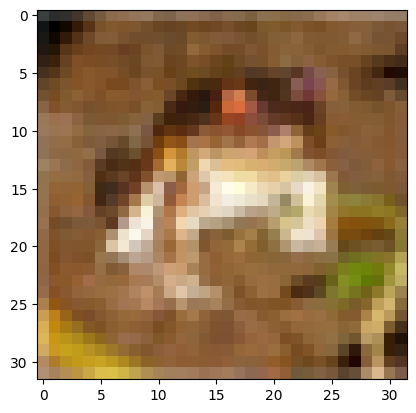

In [3]:
plt.imshow(X_train[0])
images = []

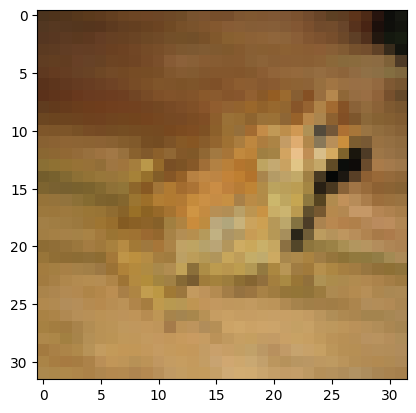

In [5]:
plt.imshow(X_train[np.random.randint(0, 1000)])

Frog extraction

In [23]:
inds = Y_train.flatten() == 6
frogs = X_train[inds, :]
# for i in range(10, 20):
#     plt.imshow(frogs[i])
#     plt.show()

In [24]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

In [29]:
# Base Model
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))
model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics =["accuracy"])

In [ ]:
model.summary()
history = model.fit(X_train, Y_train_en, batch_size=100, epochs = 500, verbose=1,validation_data=(X_test,Y_test_en))

In [41]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4179039784283741298
xla_global_id: -1
]
